In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt





In [23]:
# Load your data
file_path = '/content/drive/MyDrive/Colab Notebooks/commodity_data_with_adjusted_prices.csv'  # Adjust to your local file path
data = pd.read_csv(file_path)

In [24]:
# Convert Month and Year into a proper datetime index
data['Date'] = pd.to_datetime(data['Month'] + '-' + data['Year'].astype(str), format='%b-%Y')
data.set_index('Date', inplace=True)












In [25]:
# Ask the user to select a commodity
commodity_choice = input(f"Select a commodity from the list: {list(data['Commodity'].unique())}: ")
commodity_data = data[data['Commodity'] == commodity_choice]


Select a commodity from the list: ['Rice', 'Wheat', 'Atta (Wheat)', 'Gram Dal', 'Tur Dal', 'Urad Dal', 'Moong Dal', 'Masoor Dal', 'Groundnut Oil', 'Mustard Oil', 'Vanaspati', 'Soya Oil', 'Sunflower Oil', 'Palm Oil', 'Potato', 'Onion', 'Tomato', 'Sugar', 'Gur', 'Milk (Rs./Ltr)', 'Tea', 'Salt']: Potato


In [26]:
# Use the Adjusted Retail Price for prediction for the selected commodity
price_series = commodity_data['Adjusted Retail Price']

# Split the data into train and test sets (e.g., 80% train, 20% test)
train_size = int(len(price_series) * 0.8)
train_data = price_series[:train_size]
test_data = price_series[train_size:]

# Fit the ARIMA model (you can adjust the order based on model tuning)
model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q) can be tuned
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [27]:
# Predict on the test data
test_predictions = arima_model.forecast(steps=len(test_data))

In [28]:
# Calculate accuracy metrics: MAE, MSE, and RMSE
mae = mean_absolute_error(test_data, test_predictions)
mse = mean_squared_error(test_data, test_predictions)
rmse = np.sqrt(mse)

print(f"Model Accuracy for {commodity_choice}:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")



Model Accuracy for Potato:
Mean Absolute Error (MAE): 1.797987876638345
Mean Squared Error (MSE): 3.9367255139120068
Root Mean Squared Error (RMSE): 1.9841183215504077


Enter the year for prediction: 2026
Enter the month for prediction (1-12): 2
Predicted Adjusted Retail Price for Potato in 2/2026: 29.953582594882292


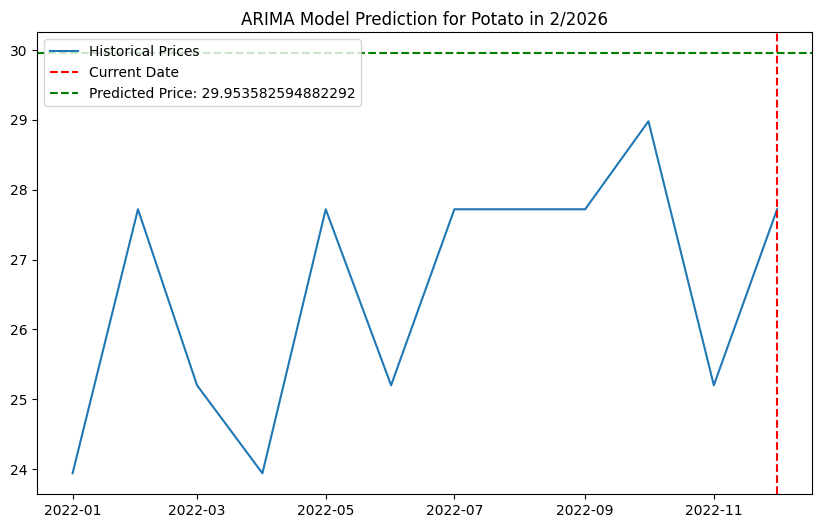

In [29]:

# Get input for future prediction
future_year = int(input("Enter the year for prediction: "))
future_month = int(input("Enter the month for prediction (1-12): "))
# Predict the future based on the number of months ahead
current_date = commodity_data.index[-1]  # last available date for the selected commodity
future_date = pd.Timestamp(year=future_year, month=future_month, day=1)

# Calculate how many months ahead the future_date is
months_ahead = (future_date.year - current_date.year) * 12 + (future_date.month - current_date.month)
# Handle if user requests a date in the past
if months_ahead <= 0:
    print("Please select a future date.")
else:
    # Make forecast for the next 'months_ahead' months
    forecast = arima_model.forecast(steps=months_ahead)[-1]  # Get the last prediction in the future

    # Output the predicted price
    print(f"Predicted Adjusted Retail Price for {commodity_choice} in {future_month}/{future_year}: {forecast}")

    # Plot the historical prices and the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(price_series, label='Historical Prices')
    plt.axvline(x=current_date, color='r', linestyle='--', label='Current Date')
    plt.axhline(y=forecast, color='g', linestyle='--', label=f'Predicted Price: {forecast}')
    plt.title(f'ARIMA Model Prediction for {commodity_choice} in {future_month}/{future_year}')
    plt.legend()
    plt.show()

